# Predict Loan Eligibility for Dream Housing Finance company
Dream Housing Finance company deals in all kinds of home loans. They have presence across all urban, semi urban and rural areas. Customer first applies for home loan and after that company validates the customer eligibility for loan.

Company wants to automate the loan eligibility process (real time) based on customer detail provided while filling online application form. These details are Gender, Marital Status, Education, Number of Dependents, Income, Loan Amount, Credit History and others. To automate this process, they have provided a dataset to identify the customers segments that are eligible for loan amount so that they can specifically target these customers. 



## Variable Description
- **Loan_ID** &emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp; Unique Loan ID

- **Gender**	&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;   Male/ Female
- **Married**	&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;Applicant married (Y/N)
- **Dependents**	&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;Number of dependents
- **Education Applicant** &emsp;&emsp;Education (Graduate/ Under Graduate)
- **Self_Employed**	&emsp;&emsp;&emsp;&emsp;&emsp;Self employed (Y/N)
- **ApplicantIncome**	&emsp;&emsp;&emsp;&emsp;Applicant income
- **CoapplicantIncome**	&emsp;&emsp;&emsp;Coapplicant income
- **LoanAmount**&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;	Loan amount in thousands
- **Loan_Amount_Term**	&emsp;&emsp;&emsp;Term of loan in months
- **Credit_History**&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;	credit history meets guidelines
- **Property_Area**	&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;Urban/ Semi Urban/ Rural
- **Loan_Status**	&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;(Target) Loan approved (Y/N)

## IMPORTING THE NECCESSARY LIBRARIES

In [171]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import numpy as np
from sklearn.preprocessing import RobustScaler, OrdinalEncoder, StandardScaler
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix, ConfusionMatrixDisplay
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split

## Loading the Datasets

In [172]:
train = pd.read_csv('train_ctrUa4K.csv')
test = pd.read_csv('test_lAUu6dG.csv')
train.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


## Getting to know the data

### Info about the data

In [173]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [174]:
train.shape, test.shape

((614, 13), (367, 12))

In [175]:
train.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [176]:
[(print(feature), print(train[feature].unique()), print("_"*80)) for feature in train.columns]

Loan_ID
['LP001002' 'LP001003' 'LP001005' 'LP001006' 'LP001008' 'LP001011'
 'LP001013' 'LP001014' 'LP001018' 'LP001020' 'LP001024' 'LP001027'
 'LP001028' 'LP001029' 'LP001030' 'LP001032' 'LP001034' 'LP001036'
 'LP001038' 'LP001041' 'LP001043' 'LP001046' 'LP001047' 'LP001050'
 'LP001052' 'LP001066' 'LP001068' 'LP001073' 'LP001086' 'LP001087'
 'LP001091' 'LP001095' 'LP001097' 'LP001098' 'LP001100' 'LP001106'
 'LP001109' 'LP001112' 'LP001114' 'LP001116' 'LP001119' 'LP001120'
 'LP001123' 'LP001131' 'LP001136' 'LP001137' 'LP001138' 'LP001144'
 'LP001146' 'LP001151' 'LP001155' 'LP001157' 'LP001164' 'LP001179'
 'LP001186' 'LP001194' 'LP001195' 'LP001197' 'LP001198' 'LP001199'
 'LP001205' 'LP001206' 'LP001207' 'LP001213' 'LP001222' 'LP001225'
 'LP001228' 'LP001233' 'LP001238' 'LP001241' 'LP001243' 'LP001245'
 'LP001248' 'LP001250' 'LP001253' 'LP001255' 'LP001256' 'LP001259'
 'LP001263' 'LP001264' 'LP001265' 'LP001266' 'LP001267' 'LP001273'
 'LP001275' 'LP001279' 'LP001280' 'LP001282' 'LP001289

[0.00000000e+00 1.50800000e+03 2.35800000e+03 4.19600000e+03
 1.51600000e+03 2.50400000e+03 1.52600000e+03 1.09680000e+04
 7.00000000e+02 1.84000000e+03 8.10600000e+03 2.84000000e+03
 1.08600000e+03 3.50000000e+03 5.62500000e+03 1.91100000e+03
 1.91700000e+03 2.92500000e+03 2.25300000e+03 1.04000000e+03
 2.08300000e+03 3.36900000e+03 1.66700000e+03 3.00000000e+03
 2.06700000e+03 1.33000000e+03 1.45900000e+03 7.21000000e+03
 1.66800000e+03 1.21300000e+03 2.33600000e+03 3.44000000e+03
 2.27500000e+03 1.64400000e+03 1.16700000e+03 1.59100000e+03
 2.20000000e+03 2.25000000e+03 2.85900000e+03 3.79600000e+03
 3.44900000e+03 4.59500000e+03 2.25400000e+03 3.06600000e+03
 1.87500000e+03 1.77400000e+03 4.75000000e+03 3.02200000e+03
 4.00000000e+03 2.16600000e+03 1.88100000e+03 2.53100000e+03
 2.00000000e+03 2.11800000e+03 4.16700000e+03 2.90000000e+03
 5.65400000e+03 1.82000000e+03 2.30200000e+03 9.97000000e+02
 3.54100000e+03 3.26300000e+03 3.80600000e+03 3.58300000e+03
 7.54000000e+02 1.030000

[(None, None, None),
 (None, None, None),
 (None, None, None),
 (None, None, None),
 (None, None, None),
 (None, None, None),
 (None, None, None),
 (None, None, None),
 (None, None, None),
 (None, None, None),
 (None, None, None),
 (None, None, None),
 (None, None, None)]

In [177]:
train.nunique()
#Since the LoanID is unique for all instances the dataset does not contain any duplicates

Loan_ID              614
Gender                 2
Married                2
Dependents             4
Education              2
Self_Employed          2
ApplicantIncome      505
CoapplicantIncome    287
LoanAmount           203
Loan_Amount_Term      10
Credit_History         2
Property_Area          3
Loan_Status            2
dtype: int64

In [178]:
train.duplicated().sum()
#The previuos inference was right

0

#### Let's see how each feature has an impact on the result whether the loan is approved

In [179]:
categorical = [feature for feature in list(train) if train[feature].dtype== 'O' or train[feature].nunique() <11]
categorical

['Loan_ID',
 'Gender',
 'Married',
 'Dependents',
 'Education',
 'Self_Employed',
 'Loan_Amount_Term',
 'Credit_History',
 'Property_Area',
 'Loan_Status']

In [180]:
plcat = categorical.copy()
plcat.remove('Loan_ID')
plcat.remove("Loan_Status")

In [181]:
plcat

['Gender',
 'Married',
 'Dependents',
 'Education',
 'Self_Employed',
 'Loan_Amount_Term',
 'Credit_History',
 'Property_Area']

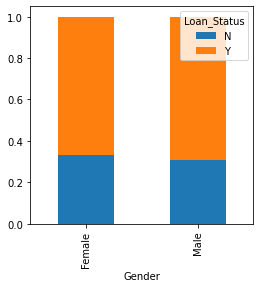

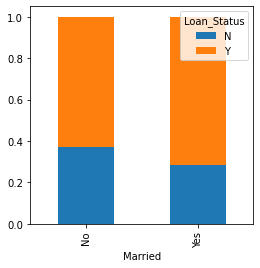

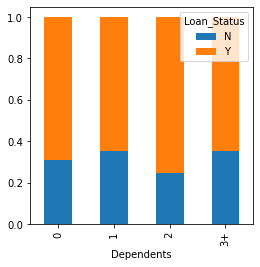

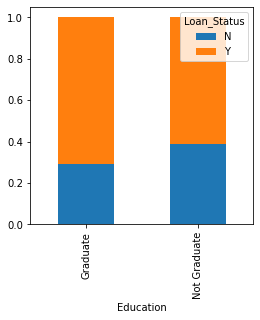

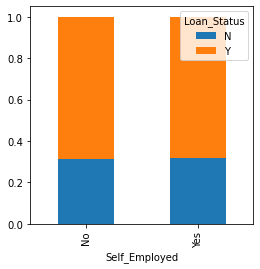

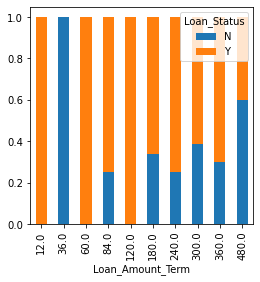

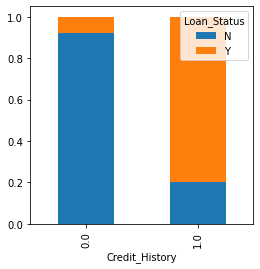

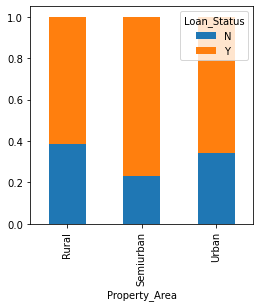

In [182]:
for feature in plcat:
    table = pd.crosstab(train[feature], train['Loan_Status'])
    table.div(table.sum(1).astype(float),axis=0).plot.bar(stacked=True, figsize=(4,4))

In [183]:
numerical = [feature for feature in list(train) if train[feature].dtype!= 'O' and train[feature].nunique() > 10]
numerical

['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount']

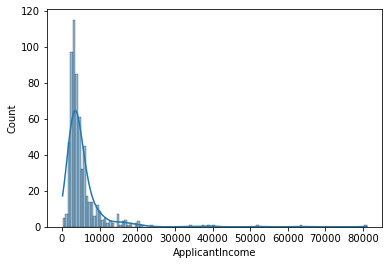

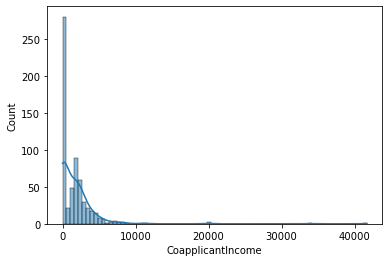

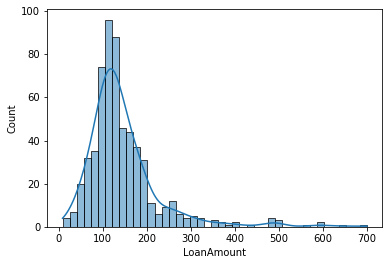

In [184]:
for feature in numerical:
    sns.histplot(train[feature], kde = True)
    plt.show()

In [185]:
train.groupby(['Property_Area','Loan_Status']).agg([min,max,np.median])


C:\Users\dhana\AppData\Local\Temp\ipykernel_572\221555610.py:1: FutureWarning: ['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education', 'Self_Employed'] did not aggregate successfully. If any error is raised this will raise in a future version of pandas. Drop these columns/ops to avoid this warning.
  train.groupby(['Property_Area','Loan_Status']).agg([min,max,np.median])


ApplicantIncome                CoapplicantIncome  \
                                      min    max  median               min   
Property_Area Loan_Status                                                    
Rural         N                       150  81000  4283.0               0.0   
              Y                       645  23803  3862.0               0.0   
Semiurban     N                      1500  33846  4166.0               0.0   
              Y                       210  39999  3846.0               0.0   
Urban         N                       416  18333  3510.0               0.0   
              Y                      1299  63337  3500.0               0.0   

                                           LoanAmount                \
                               max  median        min    max median   
Property_Area Loan_Status                                             
Rural         N             5302.0  1287.0       46.0  570.0  133.0   
              Y             8333.0  1683.0       40.0  480.0  135.0   
Semiurban     N            11300.0     0.0       62.0  495.0  133.0   
              Y            20000.0  1032.0       25.0  600.0  124.0   
Urban         N            41667.0     0.0        9.0  500.0  113.0   
              Y             8106.0  1040.0       17.0  700.0  120.0   

                          Loan_Amount_Term               Credit_History       \
                                       min    max median            min  max   
Property_Area Loan_Status                                                      
Rural         N                       84.0  480.0  360.0            0.0  1.0   
              Y                       84.0  480.0  360.0            0.0  1.0   
Semiurban     N                       36.0  480.0  360.0            0.0  1.0   
              Y                       84.0  480.0  360.0            0.0  1.0   
Urban         N                      180.0  480.0  360.0            0.0  1.0   
              Y                       12.0  480.0  360.0            0.0  1.0   

                                  
                          median  
Property_Area Loan_Status         
Rural         N              1.0  
              Y              1.0  
Semiurban     N              0.0  
              Y              1.0  
Urban         N              1.0  
              Y              1.0

## Filling NA

In [186]:
train.isnull().sum()
#The data contains lots of missing values

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [187]:
#Filling Credit_History based on whether the loan got approved

In [188]:
train['temp'] = np.where(train.Loan_Status == 'Y', 1,0)
train['Credit_History'] = train.Credit_History.fillna(train.temp)
train.drop('temp', axis=1, inplace=True)

### Filling Categorical features based on mode and numerical features based on median

In [189]:
for feature in categorical:
    train[feature].fillna(train[feature].mode()[0], inplace = True)

In [190]:
for feature in numerical:
    train[feature].fillna(train[feature].median(), inplace = True)

In [191]:
train.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

## Label Encoding

In [192]:
categorical.remove('Loan_ID')

In [193]:
categorical.remove('Loan_Amount_Term')
categorical.remove('Loan_Status')

In [194]:
categorical

['Gender',
 'Married',
 'Dependents',
 'Education',
 'Self_Employed',
 'Credit_History',
 'Property_Area']

In [195]:
numerical.append('Loan_Amount_Term')
numerical

['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term']

In [196]:
#Seperate categorical features into a separate dataframe to encode
ordinal_encoder = OrdinalEncoder()

train_encoded = ordinal_encoder.fit_transform(train[categorical])
train_encoded_df = pd.DataFrame(train_encoded, columns=categorical)
train_encoded_df[numerical] = train[numerical]
train_encoded_df

,Gender,Married,Dependents,Education,Self_Employed,Credit_History,Property_Area,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term
0,1.0,0.0,0.0,0.0,0.0,1.0,2.0,5849,0.0,128.0,360.0
1,1.0,1.0,1.0,0.0,0.0,1.0,0.0,4583,1508.0,128.0,360.0
2,1.0,1.0,0.0,0.0,1.0,1.0,2.0,3000,0.0,66.0,360.0
3,1.0,1.0,0.0,1.0,0.0,1.0,2.0,2583,2358.0,120.0,360.0
4,1.0,0.0,0.0,0.0,0.0,1.0,2.0,6000,0.0,141.0,360.0
...,...,...,...,...,...,...,...,...,...,...,...
609,0.0,0.0,0.0,0.0,0.0,1.0,0.0,2900,0.0,71.0,360.0
610,1.0,1.0,3.0,0.0,0.0,1.0,0.0,4106,0.0,40.0,180.0
611,1.0,1.0,1.0,0.0,0.0,1.0,2.0,8072,240.0,253.0,360.0
612,1.0,1.0,2.0,0.0,0.0,1.0,2.0,7583,0.0,187.0,360.0


In [197]:
corr = train_encoded_df.corr()

<AxesSubplot:>

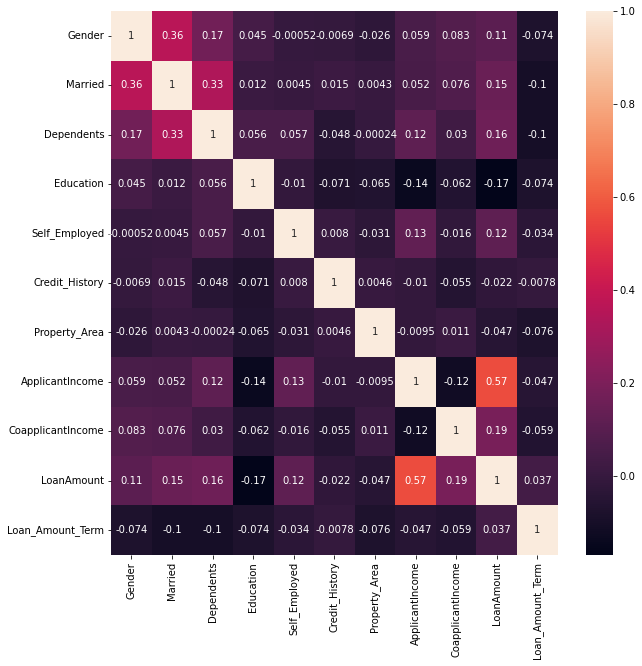

In [198]:
plt.figure(figsize=(10,10))
sns.heatmap(corr, annot = True)
#Credit History has a high relation to Loan Approval

In [199]:
X = train_encoded_df
X

,Gender,Married,Dependents,Education,Self_Employed,Credit_History,Property_Area,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term
0,1.0,0.0,0.0,0.0,0.0,1.0,2.0,5849,0.0,128.0,360.0
1,1.0,1.0,1.0,0.0,0.0,1.0,0.0,4583,1508.0,128.0,360.0
2,1.0,1.0,0.0,0.0,1.0,1.0,2.0,3000,0.0,66.0,360.0
3,1.0,1.0,0.0,1.0,0.0,1.0,2.0,2583,2358.0,120.0,360.0
4,1.0,0.0,0.0,0.0,0.0,1.0,2.0,6000,0.0,141.0,360.0
...,...,...,...,...,...,...,...,...,...,...,...
609,0.0,0.0,0.0,0.0,0.0,1.0,0.0,2900,0.0,71.0,360.0
610,1.0,1.0,3.0,0.0,0.0,1.0,0.0,4106,0.0,40.0,180.0
611,1.0,1.0,1.0,0.0,0.0,1.0,2.0,8072,240.0,253.0,360.0
612,1.0,1.0,2.0,0.0,0.0,1.0,2.0,7583,0.0,187.0,360.0


In [200]:
y = train['Loan_Status']
y

0      Y
1      N
2      Y
3      Y
4      Y
      ..
609    Y
610    Y
611    Y
612    Y
613    N
Name: Loan_Status, Length: 614, dtype: object

In [201]:
X_train,X_cv, y_train, y_cv = train_test_split(X,y,train_size = 0.7,random_state=16,stratify = y)

In [202]:
scalerR = RobustScaler()
X_scaleR = scalerR.fit(X_train)
X_transR = pd.DataFrame(scalerR.fit_transform(X_train), columns = X_train.columns)

In [203]:
X_scaleR

RobustScaler()

In [204]:
error_rate = []
for i in range(1,40):
    knn = KNeighborsClassifier(n_neighbors = i, p=1)
    knn.fit(X_transR, y_train)
    pred_i = knn.predict(X_cv)
    error_rate.append(np.mean(pred_i != y_cv))

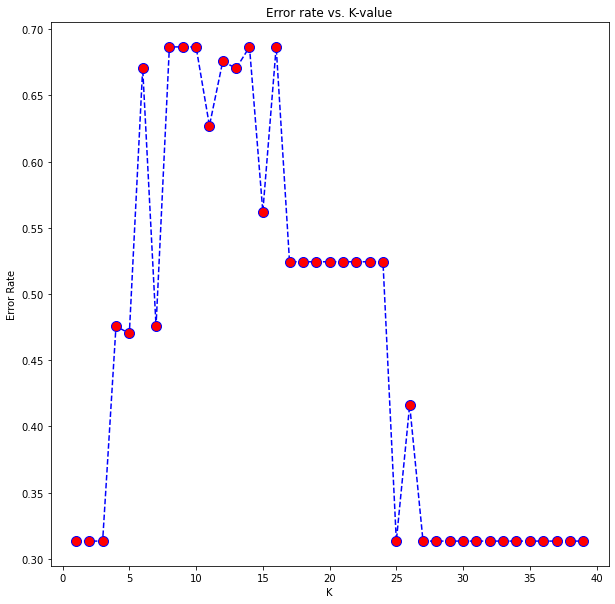

In [205]:
plt.figure(figsize=(10,10))
plt.plot(range(1,40),error_rate , color = 'blue', linestyle = 'dashed',marker = 'o',
        markerfacecolor = 'red',markersize= 10)
plt.title('Error rate vs. K-value')
plt.xlabel('K')
plt.ylabel('Error Rate')
plt.show()

In [206]:
# Plotting the error rate we see that N-neighbors of 3 has the least error hence we go with n = 3

In [207]:
knn = KNeighborsClassifier(n_neighbors = 3,p=1)
print(knn.fit(X_transR,y_train))

KNeighborsClassifier(n_neighbors=3, p=1)


In [208]:
y_pred_train = knn.predict(X_train)
y_pred_cv = knn.predict(X_cv)

In [209]:
print(accuracy_score(y_pred_train,y_train))
print(accuracy_score(y_train,y_pred_train))
print(accuracy_score(y_cv,y_pred_cv))

0.6876456876456877
0.6876456876456877
0.6864864864864865


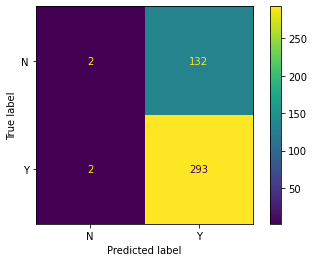

In [210]:
cm = confusion_matrix(y_train, y_pred_train, labels=knn.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=knn.classes_)
disp.plot()
plt.show()

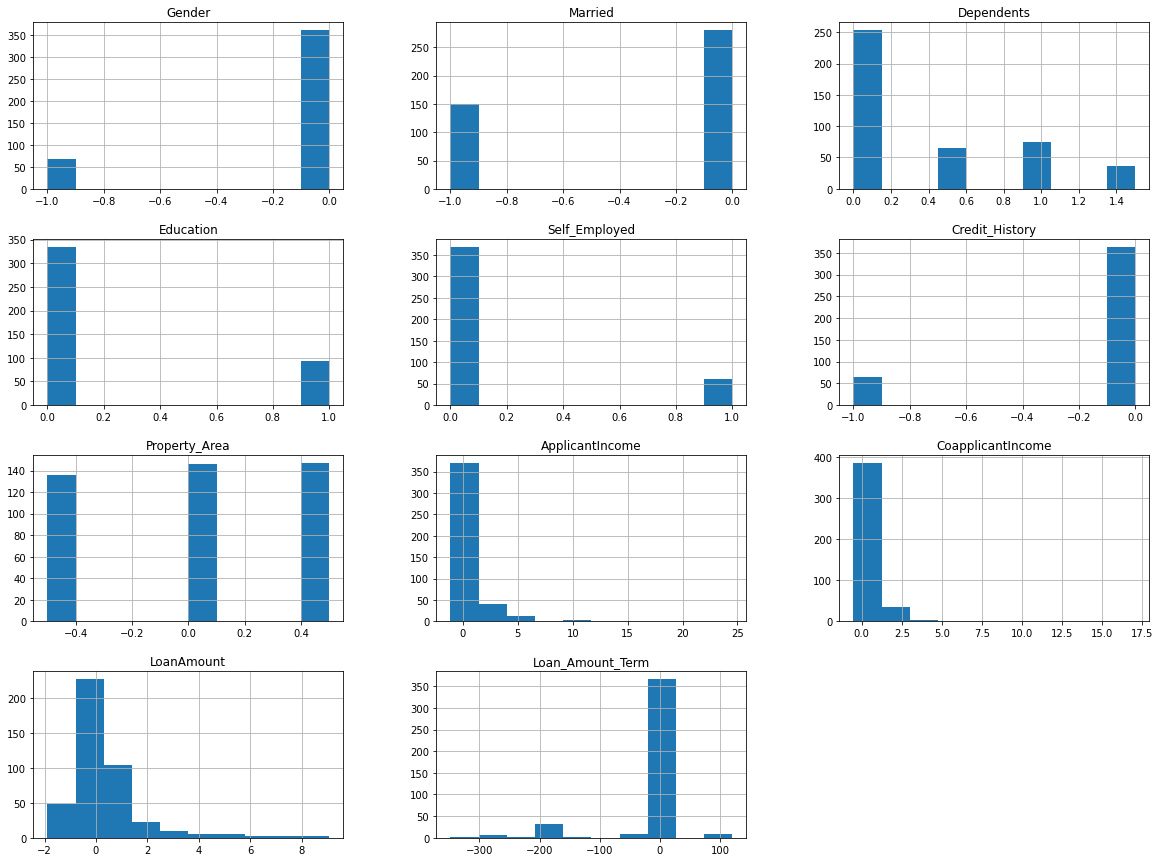

In [211]:
X_transR.hist(figsize=(20,15))
plt.show()

# NaiveBayes

In [232]:
accu_rate = []
for s in range(1,20):
    X_train,X_cv, y_train, y_cv = train_test_split(X,y,train_size = 0.7,random_state=s,stratify = y)
    model = GaussianNB()
    model.fit(X_train, y_train)
    pred_s = model.predict(X_train)
    accu_rate.append(accuracy_score(y_train,y_pred_train))

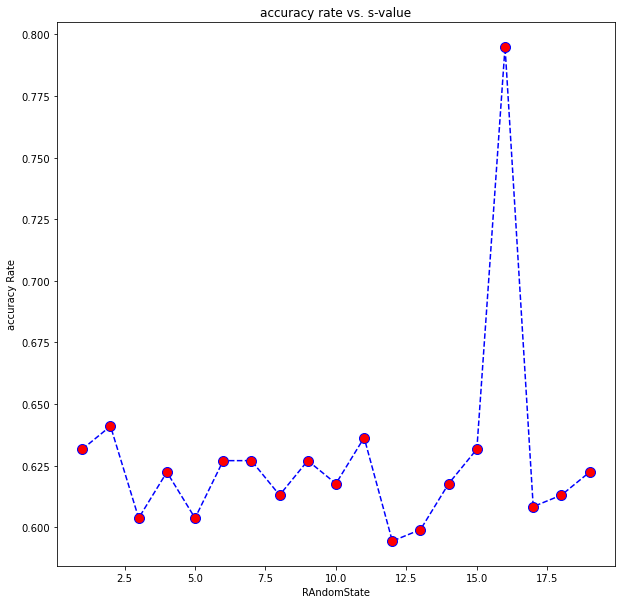

In [233]:
plt.figure(figsize=(10,10))
plt.plot(range(1,20),accu_rate , color = 'blue', linestyle = 'dashed',marker = 'o',
        markerfacecolor = 'red',markersize= 10)
plt.title('accuracy rate vs. s-value')
plt.xlabel('RAndomState')
plt.ylabel('accuracy Rate')
plt.show()

#### We find that randomstate 16 has the best accuracy

In [214]:
X_train,X_cv, y_train, y_cv = train_test_split(X,y,train_size = 0.7,random_state=16,stratify = y)

In [215]:
model = GaussianNB() 
model.fit(X_train, y_train)

GaussianNB()

In [216]:
y_pred_train = model.predict(X_train)
y_pred_cv = model.predict(X_cv)

In [217]:
print(accuracy_score(y_train,y_pred_train))
print(accuracy_score(y_cv,y_pred_cv))

0.7948717948717948
0.8864864864864865


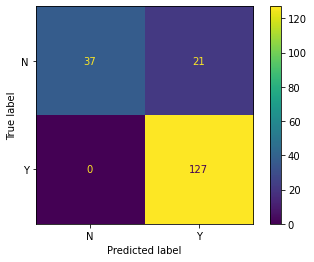

In [218]:
cm = confusion_matrix(y_cv, y_pred_cv, labels=knn.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=knn.classes_)
disp.plot()
plt.show()

## Model testing on the test dataset

In [219]:
test.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,LP001015,Male,Yes,0,Graduate,No,5720,0,110.0,360.0,1.0,Urban
1,LP001022,Male,Yes,1,Graduate,No,3076,1500,126.0,360.0,1.0,Urban
2,LP001031,Male,Yes,2,Graduate,No,5000,1800,208.0,360.0,1.0,Urban
3,LP001035,Male,Yes,2,Graduate,No,2340,2546,100.0,360.0,NaN,Urban
4,LP001051,Male,No,0,Not Graduate,No,3276,0,78.0,360.0,1.0,Urban


In [220]:
test_cat =[i for i in categorical]
test_cat

['Gender',
 'Married',
 'Dependents',
 'Education',
 'Self_Employed',
 'Credit_History',
 'Property_Area']

In [221]:
test_num = [i for i in numerical]
test_num

['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term']

In [222]:
for feature in test_cat:
    test[feature].fillna(test[feature].mode()[0], inplace = True)

In [223]:
for feature in numerical:
    test[feature].fillna(test[feature].median(), inplace = True)

In [224]:
test_encode = ordinal_encoder.fit_transform(test[test_cat])
test_en_df = pd.DataFrame(test_encode, columns = test_cat)
test_en_df[test_num] = test[test_num]
test_en_df.head()

,Gender,Married,Dependents,Education,Self_Employed,Credit_History,Property_Area,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term
0,1.0,1.0,0.0,0.0,0.0,1.0,2.0,5720,0,110.0,360.0
1,1.0,1.0,1.0,0.0,0.0,1.0,2.0,3076,1500,126.0,360.0
2,1.0,1.0,2.0,0.0,0.0,1.0,2.0,5000,1800,208.0,360.0
3,1.0,1.0,2.0,0.0,0.0,1.0,2.0,2340,2546,100.0,360.0
4,1.0,0.0,0.0,1.0,0.0,1.0,2.0,3276,0,78.0,360.0


In [225]:
test_en_df.isnull().sum()

Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
Credit_History       0
Property_Area        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
dtype: int64

In [226]:
test_pred = model.predict(test_en_df)
test_pred

array(['Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'N', 'Y', 'Y', 'Y', 'Y', 'Y',
       'N', 'Y', 'Y', 'Y', 'Y', 'N', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'N',
       'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'N', 'Y', 'Y', 'Y',
       'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y',
       'Y', 'Y', 'Y', 'N', 'Y', 'Y', 'N', 'Y', 'Y', 'Y', 'Y', 'N', 'Y',
       'Y', 'N', 'N', 'Y', 'N', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y',
       'Y', 'Y', 'N', 'N', 'N', 'Y', 'N', 'N', 'Y', 'Y', 'Y', 'Y', 'Y',
       'Y', 'Y', 'Y', 'N', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'N', 'Y', 'Y',
       'Y', 'Y', 'N', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y',
       'N', 'N', 'N', 'Y', 'Y', 'Y', 'N', 'N', 'Y', 'N', 'Y', 'Y', 'Y',
       'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'N', 'Y', 'N',
       'Y', 'Y', 'Y', 'Y', 'N', 'Y', 'Y', 'Y', 'Y', 'Y', 'N', 'Y', 'Y',
       'Y', 'Y', 'Y', 'Y', 'Y', 'N', 'Y', 'Y', 'Y', 'N', 'N', 'Y', 'N',
       'Y', 'Y', 'Y', 'Y', 'N', 'N', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y

In [227]:
pred_df = pd.DataFrame()
pred_df['Loan_ID'] = test['Loan_ID']
pred_df['Loan_Status'] = test_pred.tolist()
pred_df['Loan_Status'].value_counts()

Y    301
N     66
Name: Loan_Status, dtype: int64

In [228]:
pred_df.to_csv('LoanPrediction_submission.csv', index=None)

In [229]:
pd.read_csv('LoanPrediction_submission.csv')

,Loan_ID,Loan_Status
0,LP001015,Y
1,LP001022,Y
2,LP001031,Y
3,LP001035,Y
4,LP001051,Y
...,...,...
362,LP002971,Y
363,LP002975,Y
364,LP002980,Y
365,LP002986,Y


#### Since NaiveBayes has a higher prediction we go with it